In [1]:
'''
The Trapped Knight:

Description:

'''

'\nThe Trapped Knight:\n\nDescription:\n\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

In [4]:
def knight_next(iy, ix):
    """Get the position of the next square visited by the knight."""

    next_sq = []
    moves = (-1,-2), (-1,2), (1,-2), (1,2), (-2,-1), (-2,1), (2,-1), (2,1)
    for dy, dx in moves:
        jy, jx = iy + dy, ix + dx
        if 0 <= jx < n and 0 <= jy < n:
            if (jy, jx) not in visited:
                next_sq.append((jy, jx))
    if not next_sq:
        # No valid moves – we're done: return None
        return
    return min(next_sq, key=lambda e: grid[e[0]][e[1]])

In [5]:
def input_next(iy, ix):
    """Get the position of the next square visited."""

    next_sq = []
    moves = (-3,-2), (-3,2), (3,-2), (3,2), (-2,-3), (-2,3), (2,-3), (2,3)
    for dy, dx in moves:
        jy, jx = iy + dy, ix + dx
        if 0 <= jx < n and 0 <= jy < n:
            if (jy, jx) not in visited:
                next_sq.append((jy, jx))
    if not next_sq:
        # No valid moves – we're done: return None
        return
    return min(next_sq, key=lambda e: grid[e[0]][e[1]])

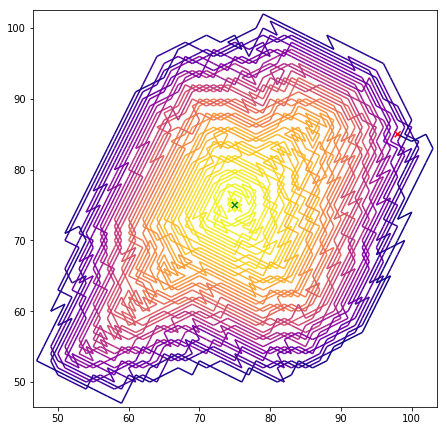

In [29]:
# Set up the grid: a board of 100 x 100 squares is enough.
#def trapped_knight():

def spiral_grid(n):
    #n = 100
    grid = [[0]*n for i in range(n)]
    ix, iy = 0, 0
    dx, dy = 1, 0
    s = 1
    i = 0
    while i <= n*n:
        for j in range(s):
            i += 1
            try:
                grid[iy+n//2][ix+n//2] = i
            except IndexError:
                break
            ix += dx
            iy -= dy
        dx, dy = dy, dx
        if dy:
            dy = -dy
        else:
            s += 1
            
    return grid

DPI = 72
width, height = 700, 525
fig, ax = plt.subplots(figsize=(width/DPI, height/DPI), dpi=DPI)
ax.axis('square')

n = 150
grid = spiral_grid(n)

# Keep track of the visited squares' indexes in the list visited.
visited = []
iy, ix = n//2, n//2
i = 0
# Run the game until there are no valid moves and print the visited squares.
while True:
    i += 1
    visited.append((iy, ix))
    try:
        iy, ix = knight_next(iy, ix) # variable step
    except TypeError:
        break
#print(', '.join(str(grid[iy][ix]) for iy, ix in visited))
#print('Done in {} steps'.format(i))

# Plot the path of the knight on a chessboard in a pleasing colour scheme.
points = np.array(visited).reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(1, len(visited))
lc = LineCollection(segments, cmap='plasma_r', norm=norm) #plasma_r
lc.set_array(np.array(range(len(visited))))
line = ax.add_collection(lc)

ax.scatter([visited[0][0], visited[-1][0]], [visited[0][1], visited[-1][1]],
           c=('g','r'), marker='x', zorder=10)

ptp = np.concatenate( (np.min(points[:,:], axis=0),
                       np.max(points[:,:], axis=0)) ).T

ax.set_xlim(ptp[0][0]-0.5, ptp[0][1]+0.5)
ax.set_ylim(ptp[1][0]-0.5, ptp[1][1]+0.5)

plt.savefig('trapped-knight.png', dpi=DPI)
plt.show()

In [26]:
[visited[0][0], visited[-1][0]]

[50, 92]

In [27]:
[visited[0][1], visited[-1][1]]

[50, 84]

In [28]:
visited

[(50, 50),
 (52, 51),
 (53, 53),
 (55, 54),
 (56, 56),
 (58, 57),
 (59, 59),
 (61, 60),
 (62, 62),
 (64, 63),
 (65, 65),
 (67, 66),
 (68, 68),
 (70, 69),
 (71, 71),
 (73, 72),
 (74, 74),
 (75, 76),
 (76, 74),
 (74, 75),
 (76, 76),
 (75, 74),
 (74, 76),
 (76, 75),
 (75, 77),
 (77, 76),
 (75, 75),
 (74, 77),
 (73, 75),
 (74, 73),
 (76, 72),
 (77, 74),
 (75, 73),
 (73, 74),
 (74, 72),
 (76, 73),
 (77, 75),
 (76, 77),
 (74, 78),
 (73, 76),
 (72, 74),
 (71, 72),
 (73, 73),
 (75, 72),
 (77, 73),
 (78, 75),
 (77, 77),
 (75, 78),
 (73, 77),
 (72, 75),
 (71, 73),
 (72, 71),
 (74, 70),
 (76, 71),
 (78, 72),
 (79, 74),
 (78, 76),
 (77, 78),
 (75, 79),
 (73, 78),
 (72, 76),
 (71, 74),
 (72, 72),
 (74, 71),
 (76, 70),
 (77, 72),
 (78, 74),
 (79, 76),
 (78, 78),
 (76, 79),
 (74, 80),
 (72, 79),
 (71, 77),
 (70, 75),
 (69, 73),
 (70, 71),
 (72, 70),
 (74, 69),
 (75, 71),
 (77, 70),
 (79, 71),
 (78, 73),
 (79, 75),
 (78, 77),
 (76, 78),
 (74, 79),
 (72, 78),
 (71, 76),
 (70, 74),
 (72, 73),
 (73, 71),